<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Point-Estimate" data-toc-modified-id="Point-Estimate-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Point Estimate</a></span></li><li><span><a href="#Sampling-Distributions-and-The-Central-Limit-Theorem" data-toc-modified-id="Sampling-Distributions-and-The-Central-Limit-Theorem-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sampling Distributions and The Central Limit Theorem</a></span></li><li><span><a href="#Confidence-Interval" data-toc-modified-id="Confidence-Interval-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Confidence Interval</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction

<div class="alert alert-block alert-warning">
<font color=black>

**What?** Point estimate vs. confidece interval

</font>
</div>

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

In [16]:
# 0.12.0
import statsmodels
statsmodels.__version__

'0.12.0'

In [2]:
# setup the look and feel of the notebook
plt.rcParams['figure.figsize'] = 8, 6
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')

# Create a couple of colors to use throughout the notebook
red = sns.xkcd_rgb['vermillion']
blue = sns.xkcd_rgb['dark sky blue']

Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between data samples. In data analysis, we are often interested in the characteristics of some large population, but collecting data on the entire population may be infeasible. For example, leading up to U.S. presidential elections it could be very useful to know the political leanings of every single eligible voter, but surveying every voter is not feasible. Instead, we could poll some subset of the population, such as a thousand registered voters, and use that data to make inferences about the population as a whole.

## Point Estimate

Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. The average of a sample is known as the sample mean.
The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [3]:
# generate some random number to serve as our population
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))
print('population mean:', np.mean(population_ages))

population mean: 43.002372


In [4]:
np.random.seed(6)
sample_ages = np.random.choice(population_ages, size = 500)
print('sample mean:', np.mean(sample_ages))

sample mean: 42.388


The experiment tells us that we'd expect the distribution of the population to be a similar shape to that of the sample, so we can assume that the mean of the sample and the population should have the same value. Note that we can't say that they exactly match, but it's the best estimate we can make.

The population mean is often denoted as $\mu$, the estimated population mean as $\hat{\mu}$, mean of the sample $\bar{x}$. So here we're basically saying $\hat{\mu} = \bar{x}$, where we're using the sample mean to estimate the mean of the population and usually the larger the size of our sample, the more accurate our point estimator for the estimated population mean is going to be.

## Sampling Distributions and The Central Limit Theorem

Many statistical procedures assume that data follows a normal distribution, because the normal distribution has nice properties like being symmetric and having the majority of the data clustered within a few standard deviations of the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed.

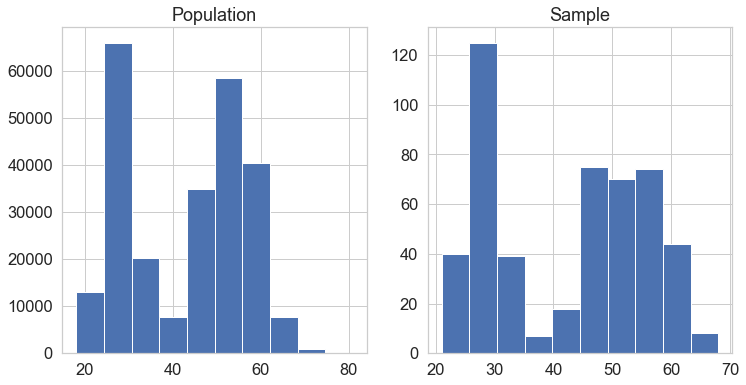

In [5]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(population_ages)
plt.title('Population')
plt.subplot(1, 2, 2)
plt.hist(sample_ages)
plt.title('Sample')
plt.show()

The plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. Because of this, the sample we drew from this population should have roughly the same shape and skew.

The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that assume a normal distribution to this data set, since it is not normal. This leads to our next topic, the **central limit theorem**.

The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution. To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

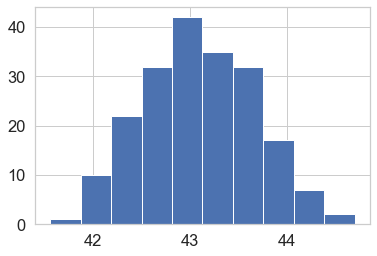

In [6]:
np.random.seed(10)
samples = 200
point_estimates = [np.random.choice(population_ages, size=500).mean()
                   for _ in range(samples)]

plt.hist(point_estimates)
plt.show()

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. In addition, the mean of the sampling distribution approaches the true population mean:

In [7]:
population_ages.mean() - np.mean(point_estimates)

-0.08440799999999626

To hit the notion home, Central Limit Theorem states that that if we collect "a large number" of different samples mean from the population, the sampling distribution, the distribution of the samples mean you collected, will approximately take the shape of a normal distribution around the population mean no matter what the orginal population distribution is.

Knowing that the sampling distribution will take the shape of a normal distribution is what makes the theorem so powerful, as it is the foundation of concepts such as confidence intervals and margins of error in frequentist statistics.

## Confidence Interval

A point estimate can give us a rough idea of a population parameter like the mean, but estimates are prone to error. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, we'd set our confidence level to 95%. Higher confidence levels result in a wider confidence intervals.

The interval is computed using the formula: 

$$
\begin{align}
\text{point estimate} \pm z * SE
\end{align}
$$

Where

- $z$ is called the **critical value** and it corresponds to the **confidence level** that we chose. Critical value is the number of standard deviations we'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations from the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with `stats.norm.ppf()`)
- $SE$ represents the **standard error**. Generally the standard error for a point estimate is estimated from the data and computed using a formula. For example, the standard error for the sample mean is $\frac{s}{ \sqrt{n} }$, where $s$ is the standard deviation and $n$ is the number of samples.
- The value $z * SE$ is called the **margin of error**.
- Note that this constructing confidence intervals framework can be easily adapted for any estimator that has a nearly normal sampling distribution. e.g. sample mean, two sample mean, sample proportion and two sample proportion (we'll later see). All we have to do this is change the way that we're calculating the standard error.

In [8]:
np.random.seed(10)
sample_size = 1000
sample = np.random.choice(population_ages, size=sample_size)
sample_mean = sample.mean()

confidence = 0.95
z_critical = stats.norm.ppf(q=confidence + (1 - confidence) / 2)
print('z-critical value:', z_critical)

pop_stdev = population_ages.std()
margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))
confint = sample_mean - margin_of_error, sample_mean + margin_of_error
print('point esimate:', sample_mean)
print('Confidence interval:', confint)

z-critical value: 1.959963984540054
point esimate: 42.523
Confidence interval: (41.70306406882683, 43.34293593117317)


Notice that the confidence interval we calculated captures the true population mean of 43.0023.
Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean:

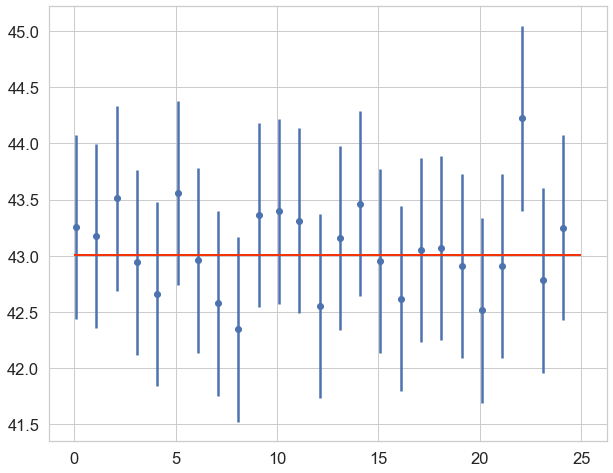

In [9]:
np.random.seed(12)
confidence = 0.95
sample_size = 1000

intervals = []
sample_means = []
for sample in range(25):
    sample = np.random.choice(population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = confidence + (1 - confidence) / 2)                    
    pop_std = population_ages.std()
    margin_error = z_critical * (pop_stdev / np.sqrt(sample_size))
    confint = sample_mean - margin_error, sample_mean + margin_error 
    intervals.append(confint)
    

plt.figure(figsize = (10, 8))
plt.errorbar(x = np.arange(0.1, 25, 1), y = sample_means, 
             yerr = [(top - bot) / 2 for top, bot in intervals], fmt = 'o')

plt.hlines(xmin = 0, xmax = 25,
           y = population_ages.mean(), 
           linewidth = 2.0, color = red)
plt.show()

Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

More formally, the definition of a 95% confidence interval means that **95% of confidence intervals, created based on random samples of the same size from the same population will contain the true population parameter**.

# References

<div class="alert alert-block alert-warning">
<font color=black>

- [Blog: What Are P-Values?](https://prateekvjoshi.com/2013/12/07/what-are-p-values/)
- [Code taken from here](https://github.com/ethen8181/machine-learning/blob/master/ab_tests/frequentist_ab_test.ipynb)

</font>
</div>